In [2]:
import matplotlib.pyplot as plt

from matplotlib.axes import Axes
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

C:\Users\robert\AppData\Local\Temp\ipykernel_15880\3885480650.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("fcc-forum-pageviews.csv")
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")

In [3]:
# Clean data
min_views, max_views = df["value"].quantile(0.025), df["value"].quantile(1 - 0.025)
df = df[(df["value"] > min_views) & (df["value"] < max_views)]

Figure(640x480)


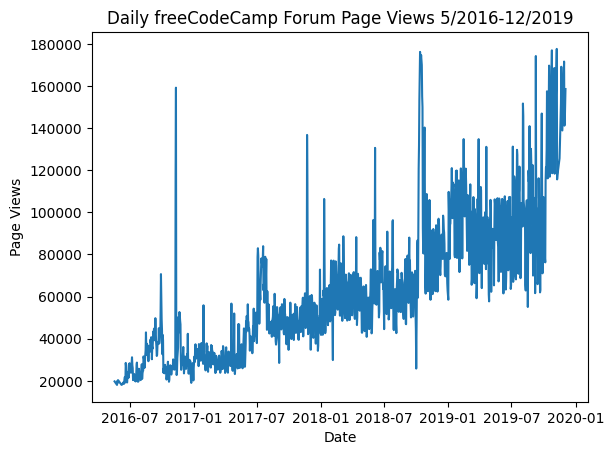

In [4]:
# Draw line plot
ax = sns.lineplot(data=df, legend=False, x="date", y="value")
ax.set(
    box_aspect=None,
    xlabel="Date",
    ylabel="Page Views",
    title="Daily freeCodeCamp Forum Page Views 5/2016-12/2019",
    autoscale_on=True,
)
print(ax.figure)

Text(0.5, 0, 'Years')

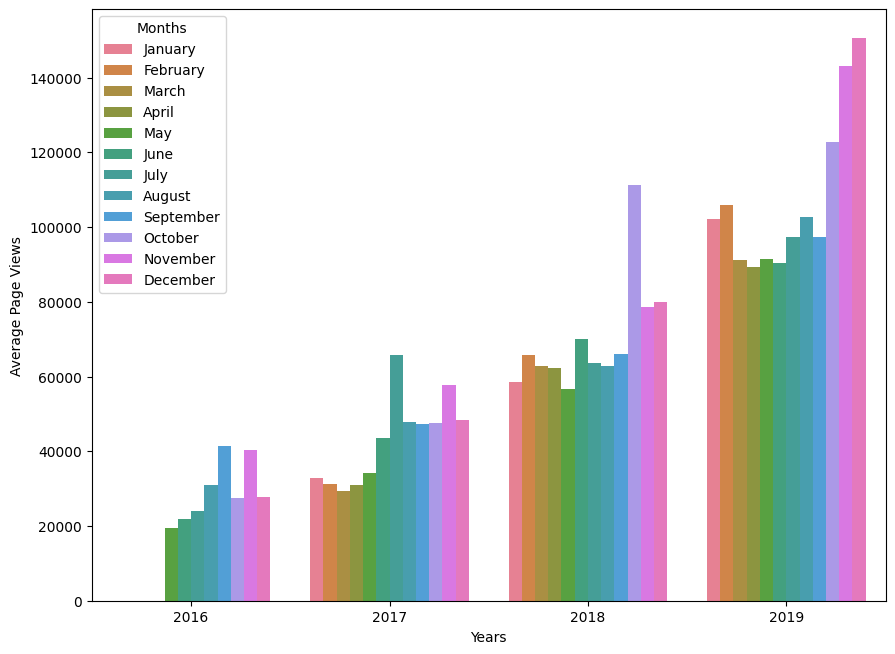

In [11]:
# Copy and modify data for monthly bar plot

sorter = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]

df_bar = df.copy().rename(columns={"value": "page_views"})

df_bar["year"] = [d.year for d in df_bar.date]
df_bar["month"] = [d.strftime("%B") for d in df_bar.date]

# Draw bar plot

fig, barax = plt.subplots(1, 1)
barax: Axes = barax
fig.set_figheight(7.68)
fig.set_figwidth(10.24)

sns.barplot(
    data=df_bar,
    x="year",
    y="page_views",
    hue="month",
    hue_order=sorter,
    errorbar=None,
    ax=barax,
)
barax.legend().set_title("Months")
barax.set_ylabel("Average Page Views")
barax.set_xlabel("Years")

Figure(1024x768)


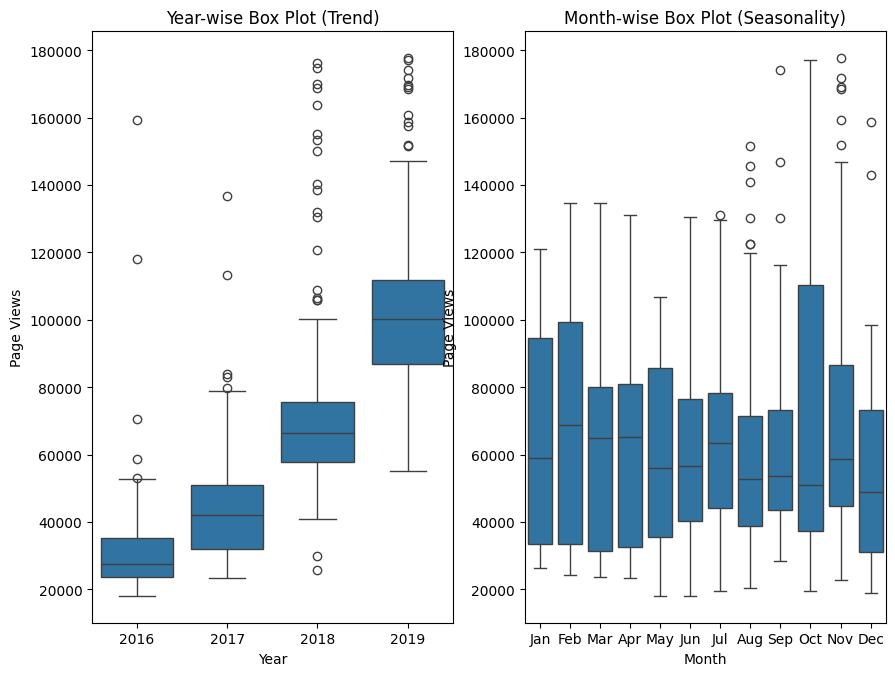

In [10]:
# Prepare data for box plots (this part is done!)
from matplotlib.axes import Axes


# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box["year"] = [d.year for d in df_box.date]
df_box["month"] = [d.strftime("%b") for d in df_box.date]

sorter = [
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
]
df.sort_values(
    by="date",
    key=lambda column: column.map(lambda e: sorter.index(e.strftime("%b"))),
    inplace=True,
)
# Draw box plots (using Seaborn)

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1: Axes = ax1
ax2: Axes = ax2
fig.set_figheight(7.68)
fig.set_figwidth(10.24)

sns.boxplot(data=df_box, x="year", y="value", ax=ax1)
ax1.set(
    box_aspect=None,
    xlabel="Year",
    ylabel="Page Views",
    title="Year-wise Box Plot (Trend)",
)

sns.boxplot(data=df_box, x="month", y="value", ax=ax2)
ax2.set(
    box_aspect=None,
    xlabel="Month",
    ylabel="Page Views",
    title="Month-wise Box Plot (Seasonality)",
)

print(fig)